In [1]:
import pandas as pd
const_str_row_divider = '\n' + ('=' * 50) + '\n'

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv', delimiter=',') #TODO

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)
pd.set_option('display.max_columns', 25) # Rioran: по дефолту DESCRIBE показывает только 20 колонок
print(df.info(), const_str_row_divider \
    , df.describe(include='all'), const_str_row_divider \
    , df.isnull().sum(), const_str_row_divider \
    , df[df['EDUCATION']==0].sum(), const_str_row_divider)
i = -1
for column in df:
    i += 1
    print(df.columns[i], 'has zeroes:', df[df[column]==0].iloc[:,i].count() \
          , ', % of total:', round(df[df[column]==0].iloc[:,i].count()/len(df.index), 2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

PAY_AMT5 has zeroes: 6703 , % of total: 0.22
PAY_AMT6 has zeroes: 7173 , % of total: 0.24
default.payment.next.month has zeroes: 23364 , % of total: 0.78


In [5]:
# (3) посчитать число женщин с университетским образованием 8656
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
df[(df['SEX'] == 2) & (df['EDUCATION'] == 2)].shape[0]

8656

In [6]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
df.drop(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1).groupby(['default.payment.next.month']).mean()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,
0,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,-0.405624,51994.227273,49717.435670,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,0.668174,0.458258,0.362116,0.254521,0.167872,0.112116,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


In [7]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table(values='ID', index=['SEX', 'EDUCATION'], columns='MARRIAGE' \
    , aggfunc='count', fill_value='-', margins=True, margins_name='Total:').sum
# Rioran: как убрать уродскую первую строку? Из-за неё шапка поехала.

<bound method DataFrame.sum of MARRIAGE           0        1        2    3  Total:
SEX    EDUCATION                                   
1      0           -      2.0      6.0    -       8
       1           1   1690.0   2633.0   30    4354
       2           1   2370.0   2940.0   63    5374
       3          12   1048.0    894.0   36    1990
       4           -     18.0     23.0    1      42
       5           -     48.0     46.0    1      95
       6           -     14.0     11.0    -      25
2      0           -      2.0      4.0    -       6
       1           3   2032.0   4176.0   20    6231
       2           5   4472.0   4080.0   99    8656
       3          32   1813.0   1015.0   67    2927
       4           -     34.0     45.0    2      81
       5           -    102.0     81.0    2     185
       6           -     14.0     10.0    2      26
Total:            54  13659.0  15964.0  323   30000>

In [8]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000
def set_TYPE_by_VALUE(X):
    return {
                  X <= 10**4:   'A',
        10**4   < X <= 10**5:   'B',
        10**5   < X <= 2*10**5: 'C',
        2*10**5 < X <= 4*10**5: 'D',
        4*10**5 < X <= 7*10**5: 'E',
        7*10**5 < X:            'F'
    }[True]
df.loc[:,'LIMIT_TYPE'] = df['LIMIT_BAL'].map(lambda n: set_TYPE_by_VALUE(n))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,LIMIT_TYPE
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,B
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,C
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,B
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,B
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,B


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

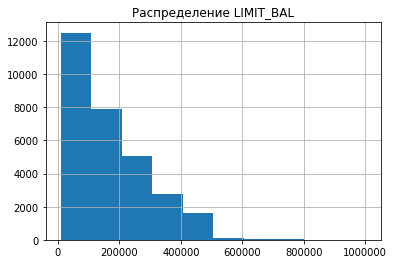

In [11]:
df['LIMIT_BAL'].hist()
plt.title("Распределение LIMIT_BAL");

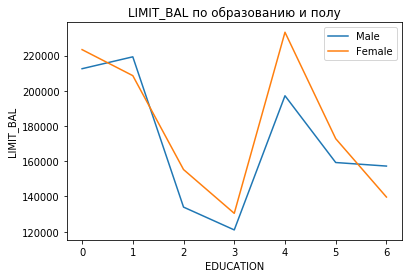

In [13]:
# (8) построить среднее значение кредитного лимита для каждого вида образования 
# и для каждого пола
# график необходимо сделать очень широким (на весь экран)
df_short = df[['EDUCATION', 'SEX', 'LIMIT_BAL']].groupby(['EDUCATION', 'SEX']).mean().unstack()
plt.plot(df_short)
plt.title("LIMIT_BAL по образованию и полу")
plt.xlabel("EDUCATION")
plt.ylabel("LIMIT_BAL")
plt.legend(['Male', 'Female'])
#import matplotlib
#matplotlib.get_backend()
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
# Как узнать ширину экрана, на котором исполняется скрипт?


Text(0,0.5,'LIMIT_BAL')

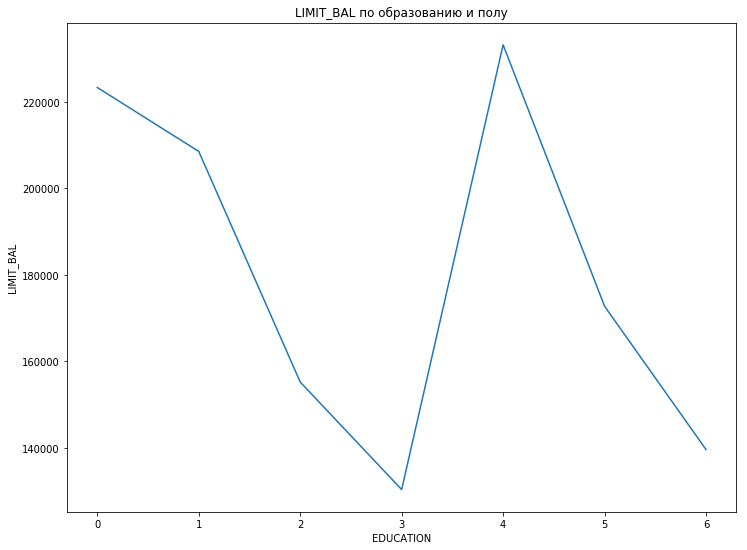

In [14]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов
intermediate_df = df[df['SEX']==2]
df_short = intermediate_df[['EDUCATION', 'SEX', 'LIMIT_BAL']].groupby(['EDUCATION', 'SEX']).mean().unstack()
plt.plot(df_short)
plt.title("LIMIT_BAL по образованию и полу")
plt.xlabel("EDUCATION")
plt.ylabel("LIMIT_BAL")

e:\python\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


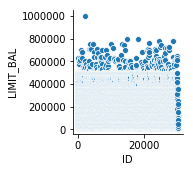

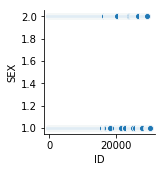

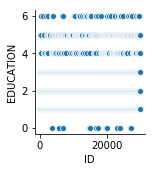

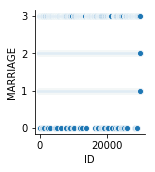

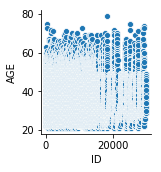

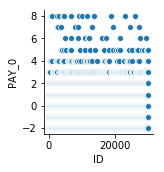

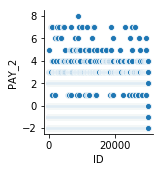

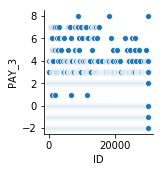

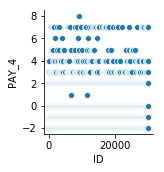

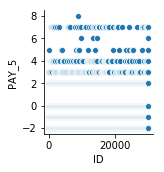

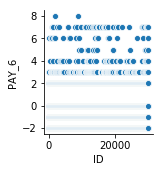

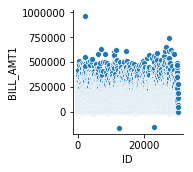

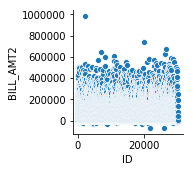

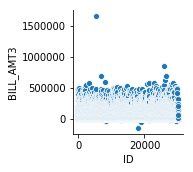

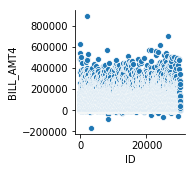

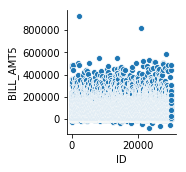

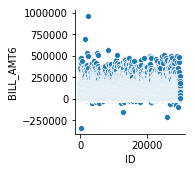

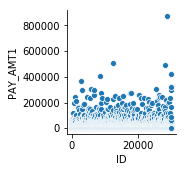

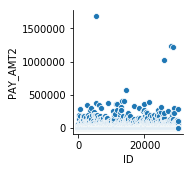

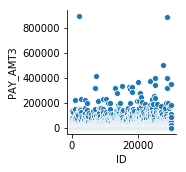

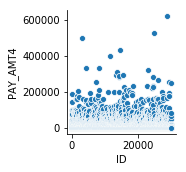

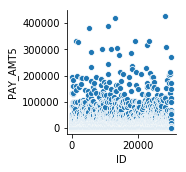

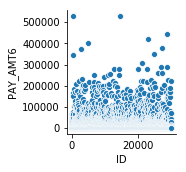

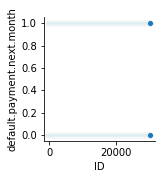

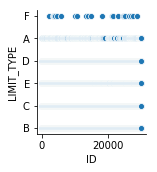

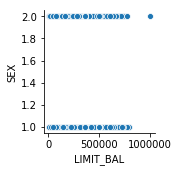

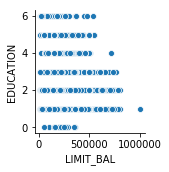

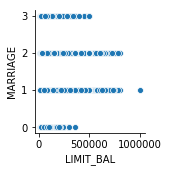

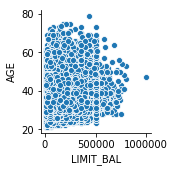

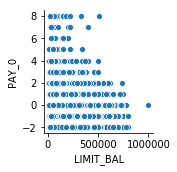

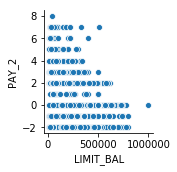

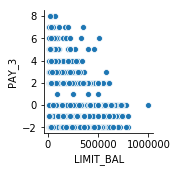

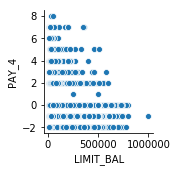

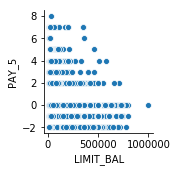

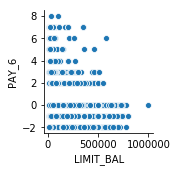

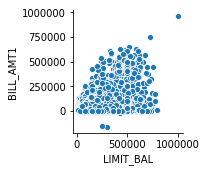

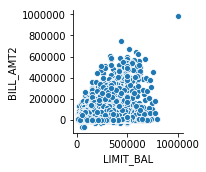

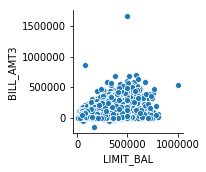

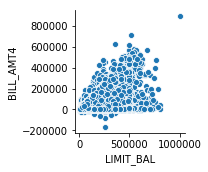

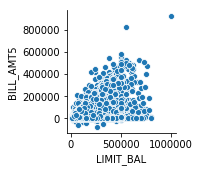

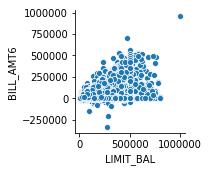

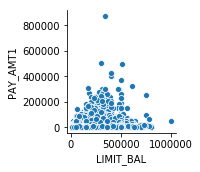

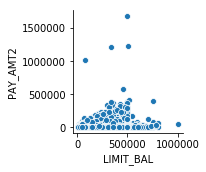

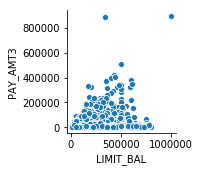

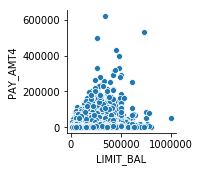

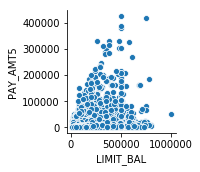

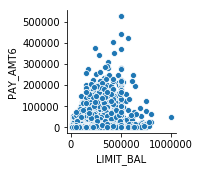

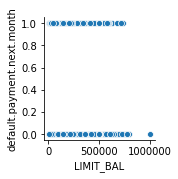

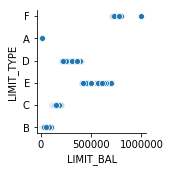

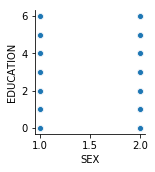

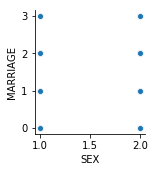

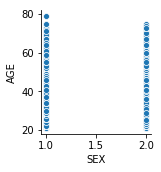

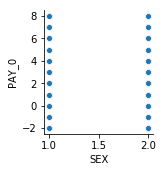

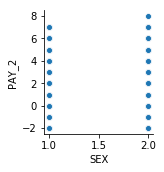

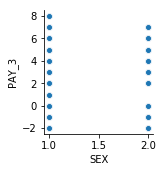

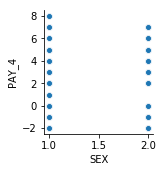

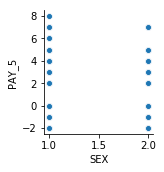

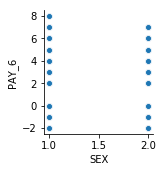

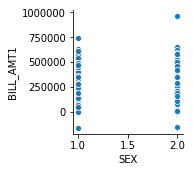

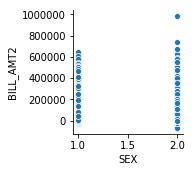

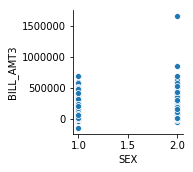

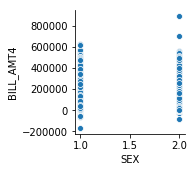

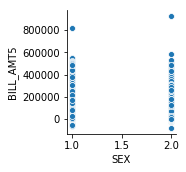

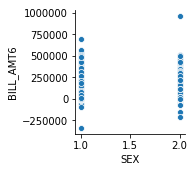

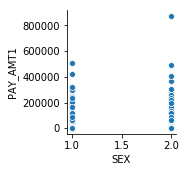

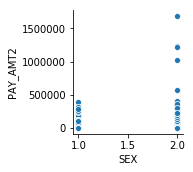

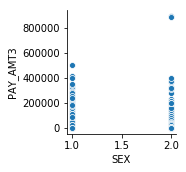

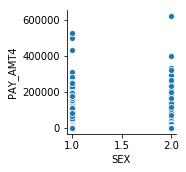

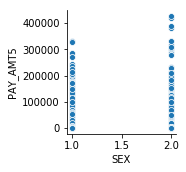

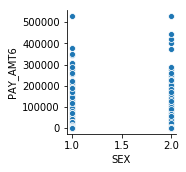

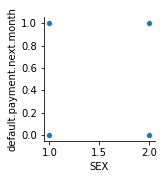

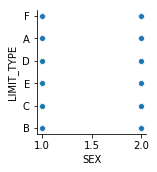

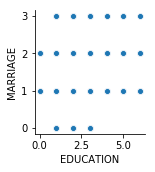

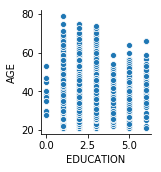

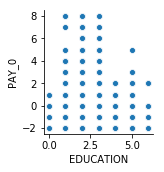

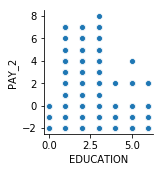

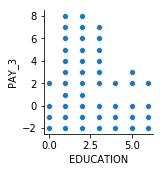

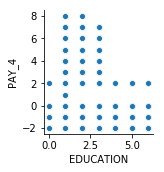

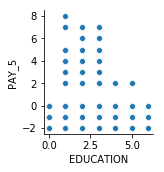

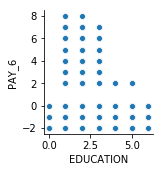

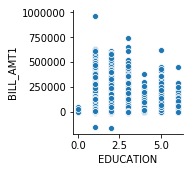

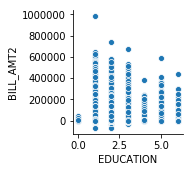

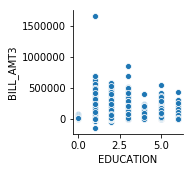

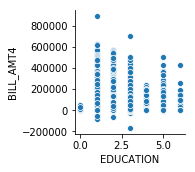

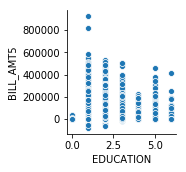

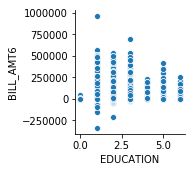

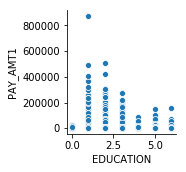

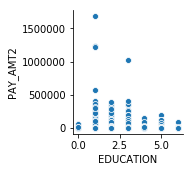

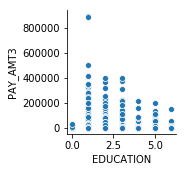

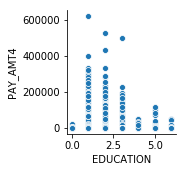

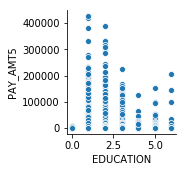

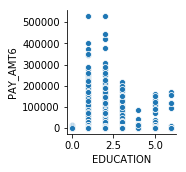

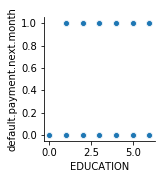

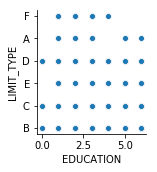

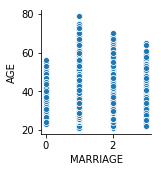

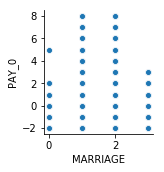

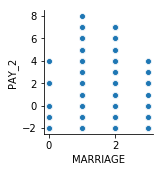

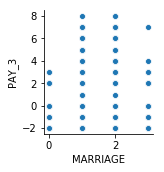

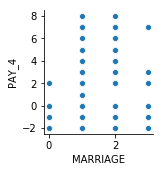

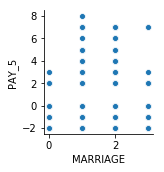

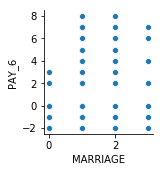

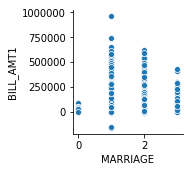

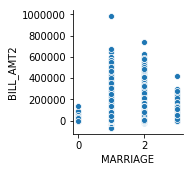

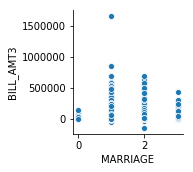

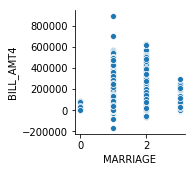

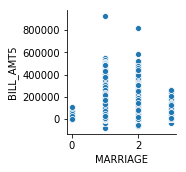

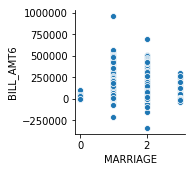

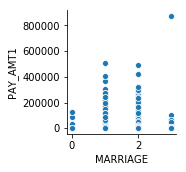

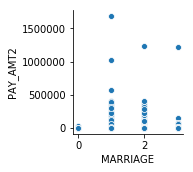

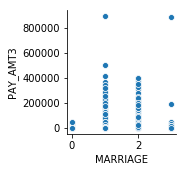

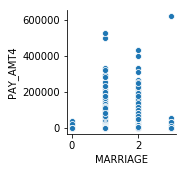

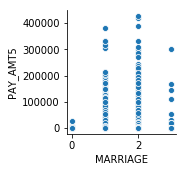

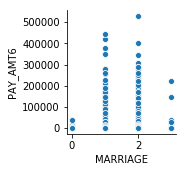

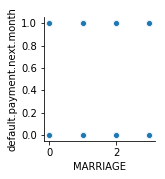

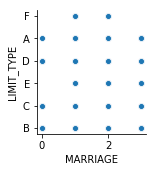

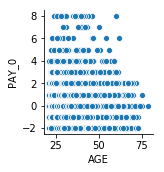

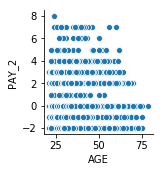

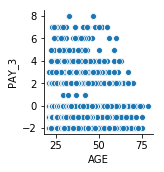

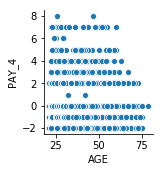

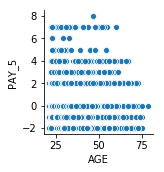

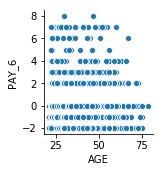

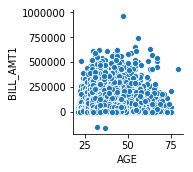

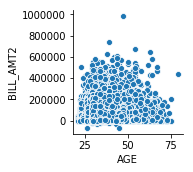

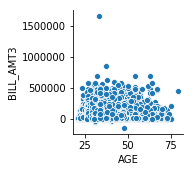

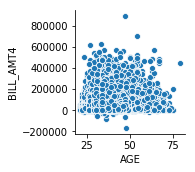

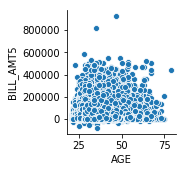

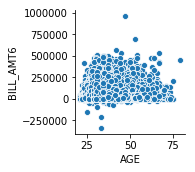

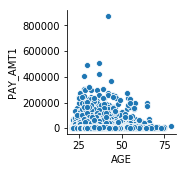

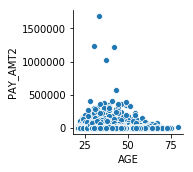

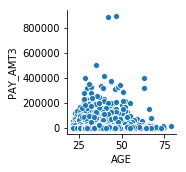

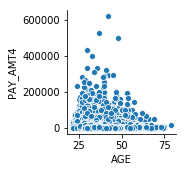

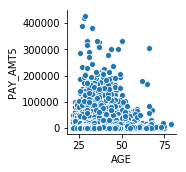

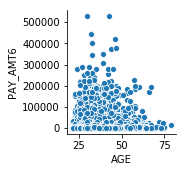

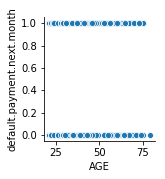

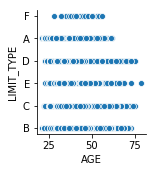

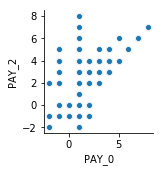

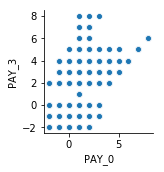

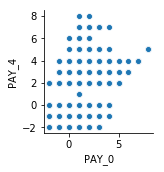

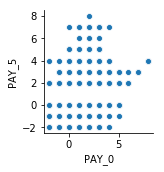

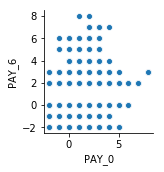

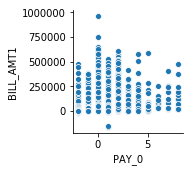

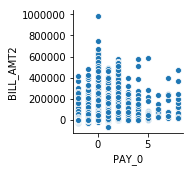

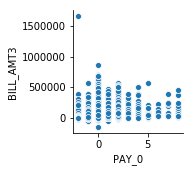

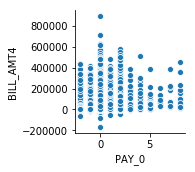

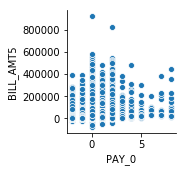

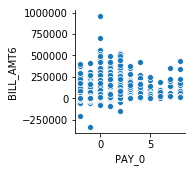

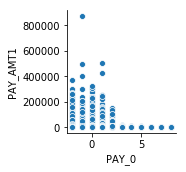

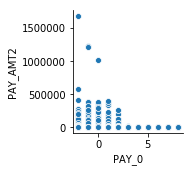

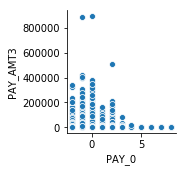

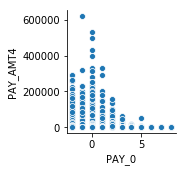

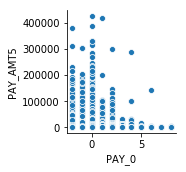

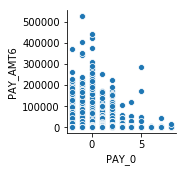

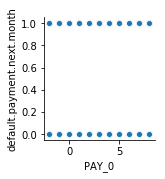

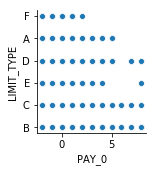

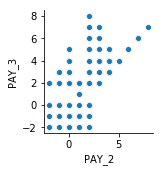

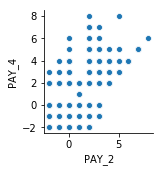

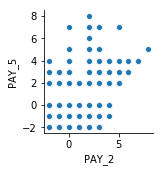

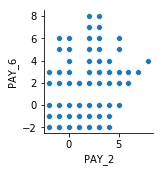

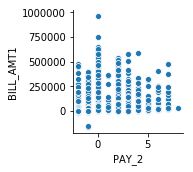

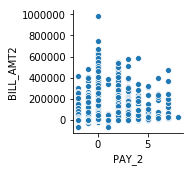

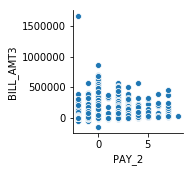

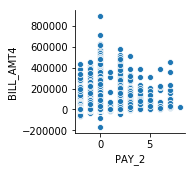

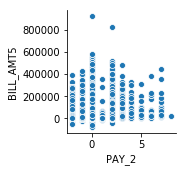

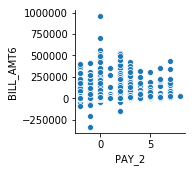

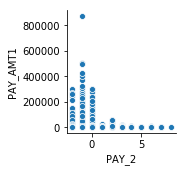

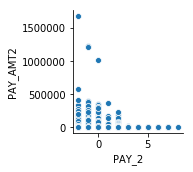

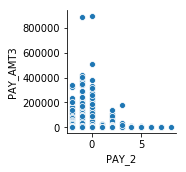

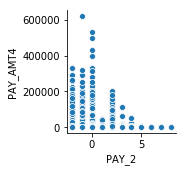

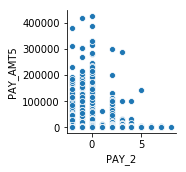

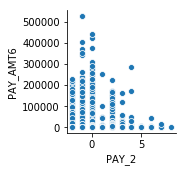

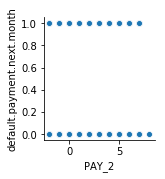

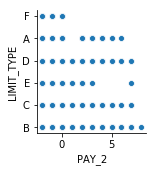

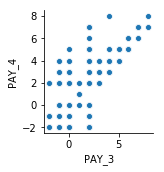

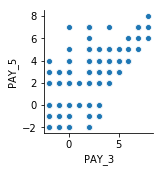

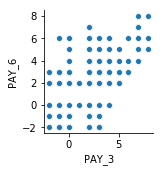

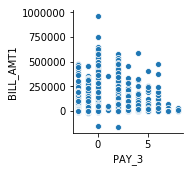

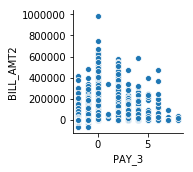

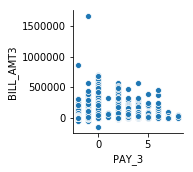

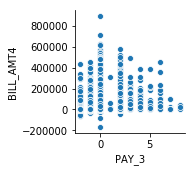

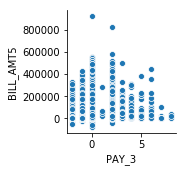

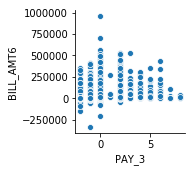

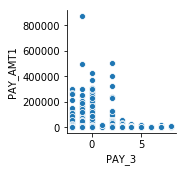

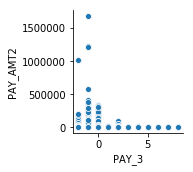

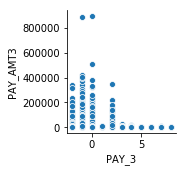

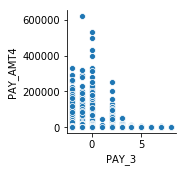

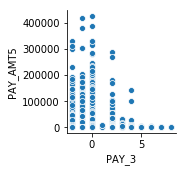

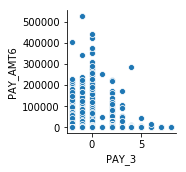

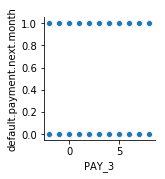

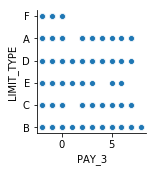

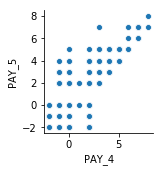

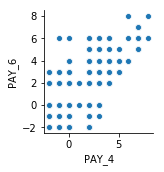

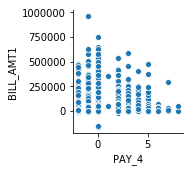

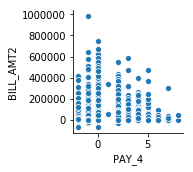

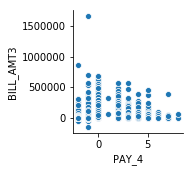

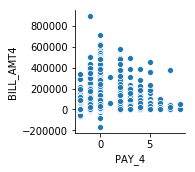

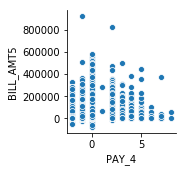

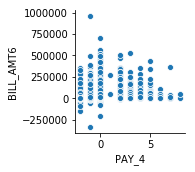

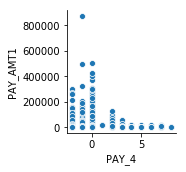

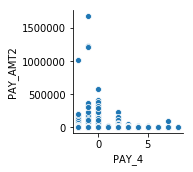

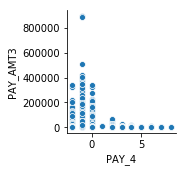

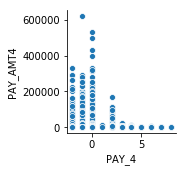

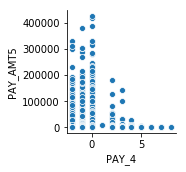

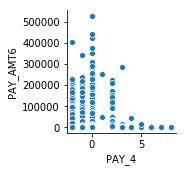

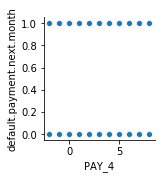

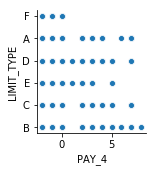

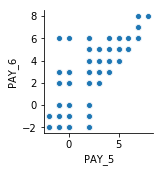

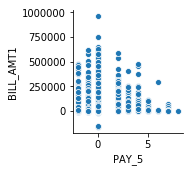

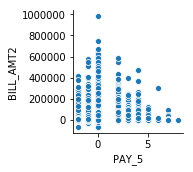

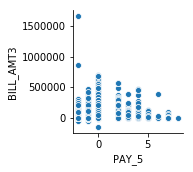

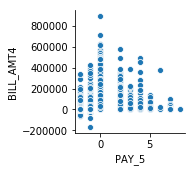

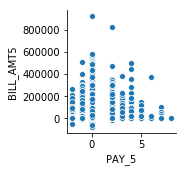

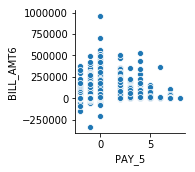

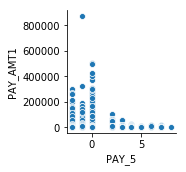

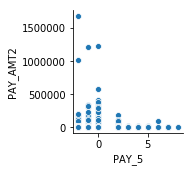

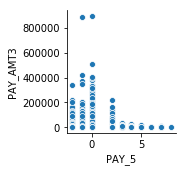

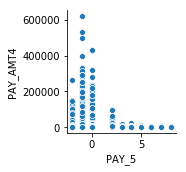

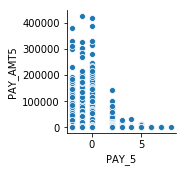

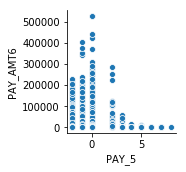

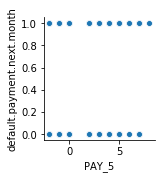

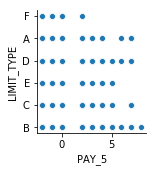

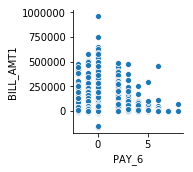

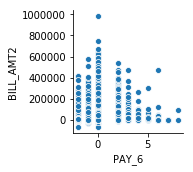

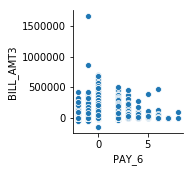

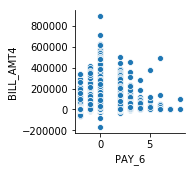

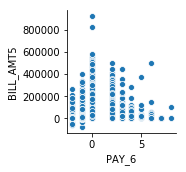

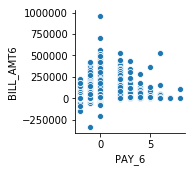

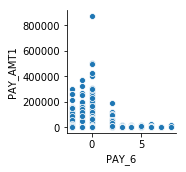

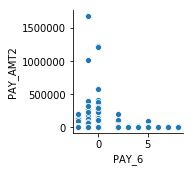

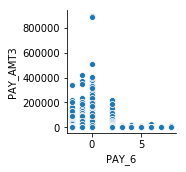

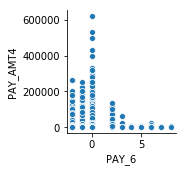

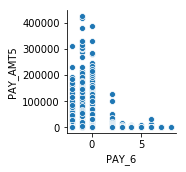

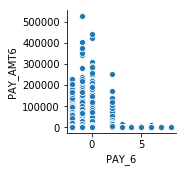

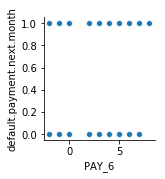

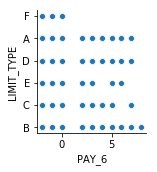

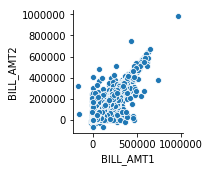

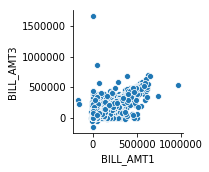

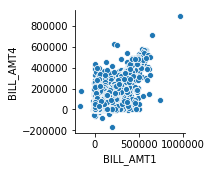

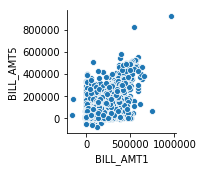

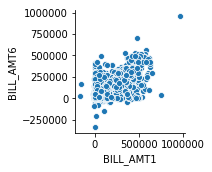

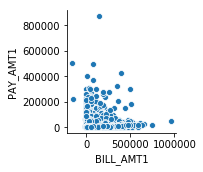

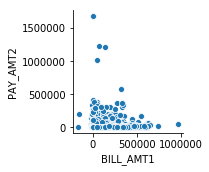

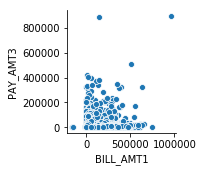

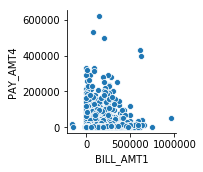

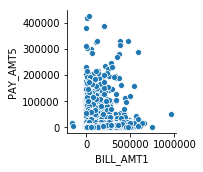

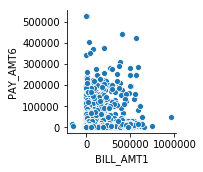

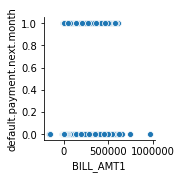

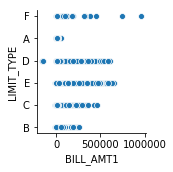

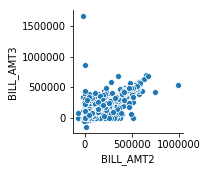

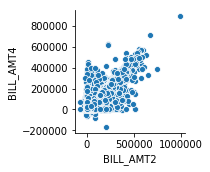

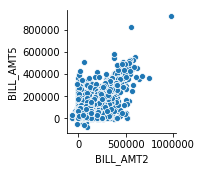

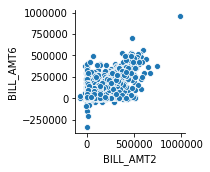

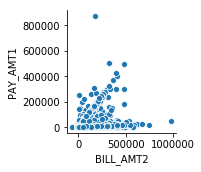

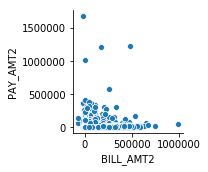

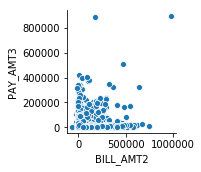

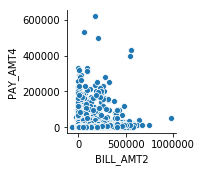

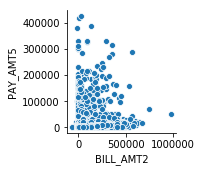

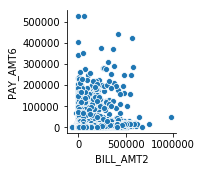

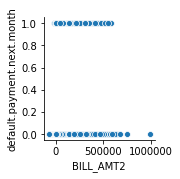

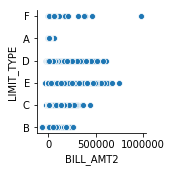

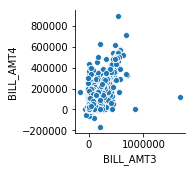

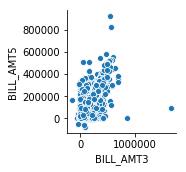

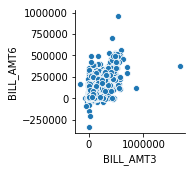

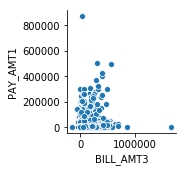

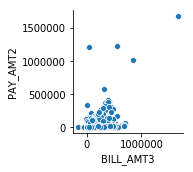

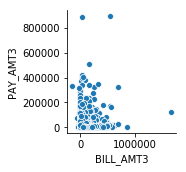

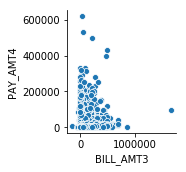

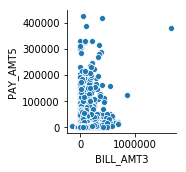

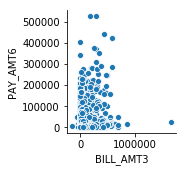

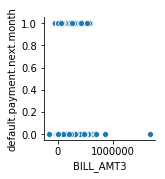

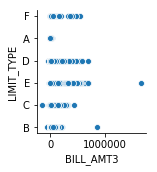

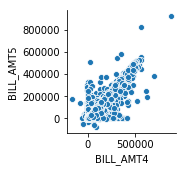

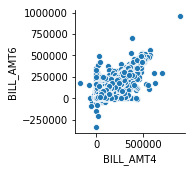

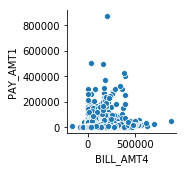

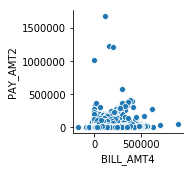

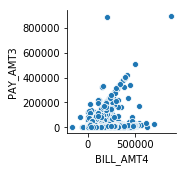

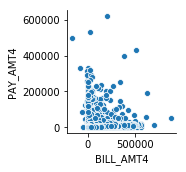

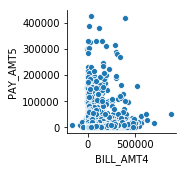

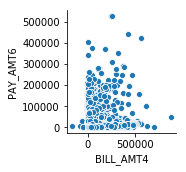

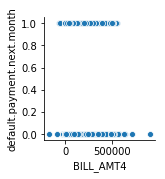

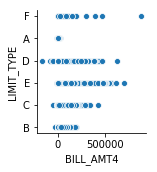

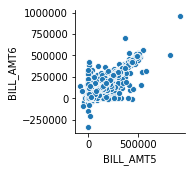

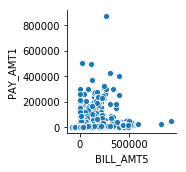

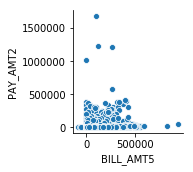

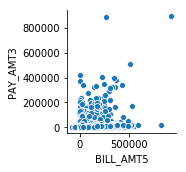

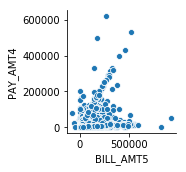

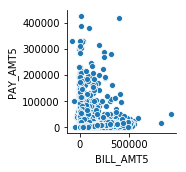

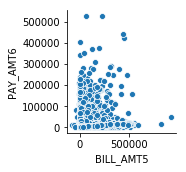

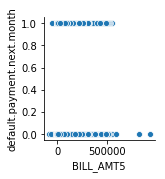

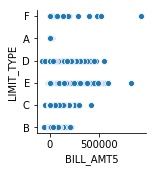

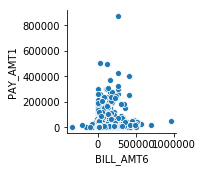

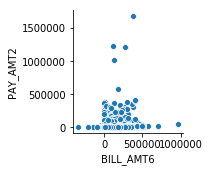

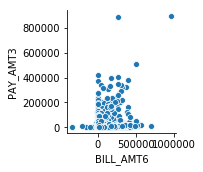

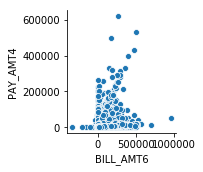

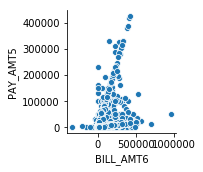

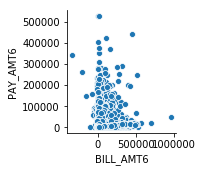

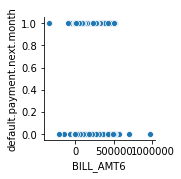

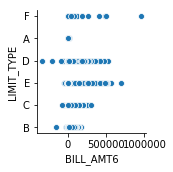

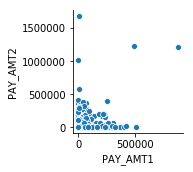

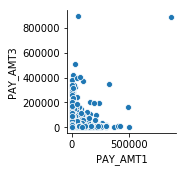

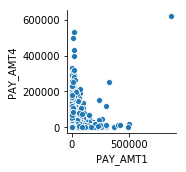

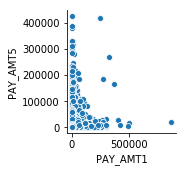

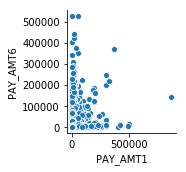

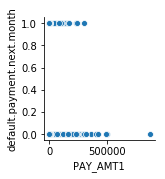

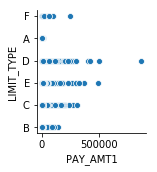

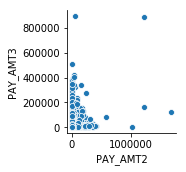

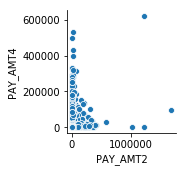

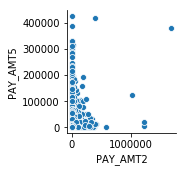

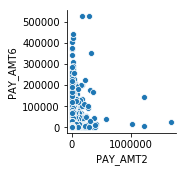

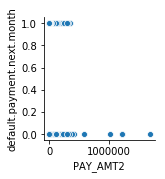

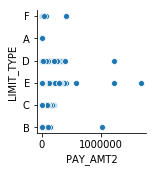

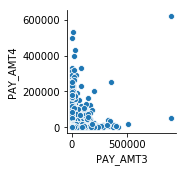

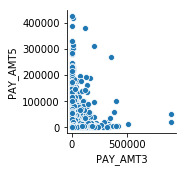

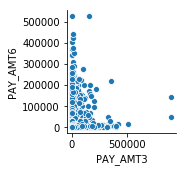

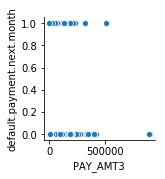

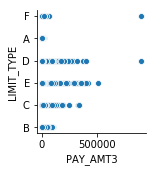

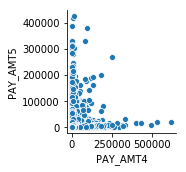

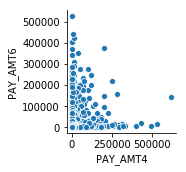

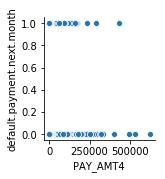

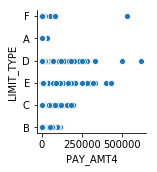

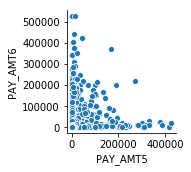

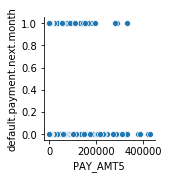

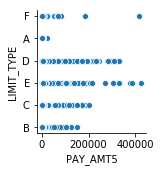

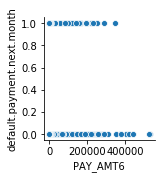

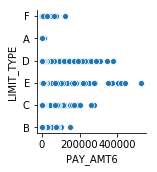

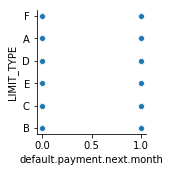

In [35]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn as sns
%matplotlib inline
for i in range(0,len(df.columns)):
    for j in range(i+1,len(df.columns)):
        sns.pairplot(df, x_vars=df.columns[i], y_vars=df.columns[j]);

In [33]:
df.columns[0]

'ID'